In [41]:
import matplotlib.pyplot as plt  
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import cv2 as cv

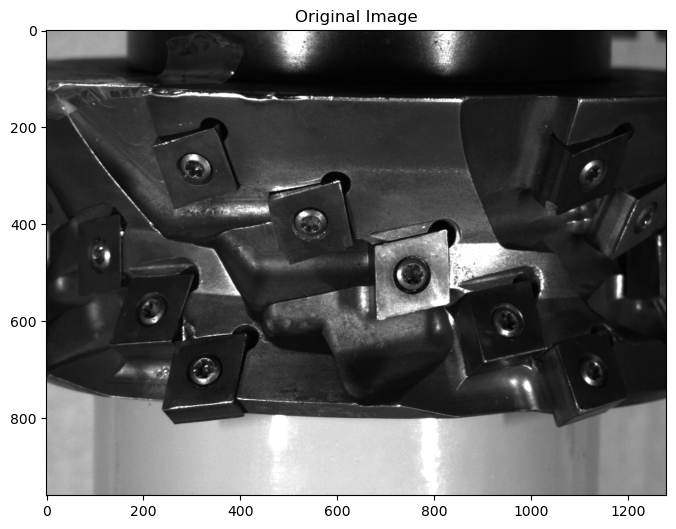

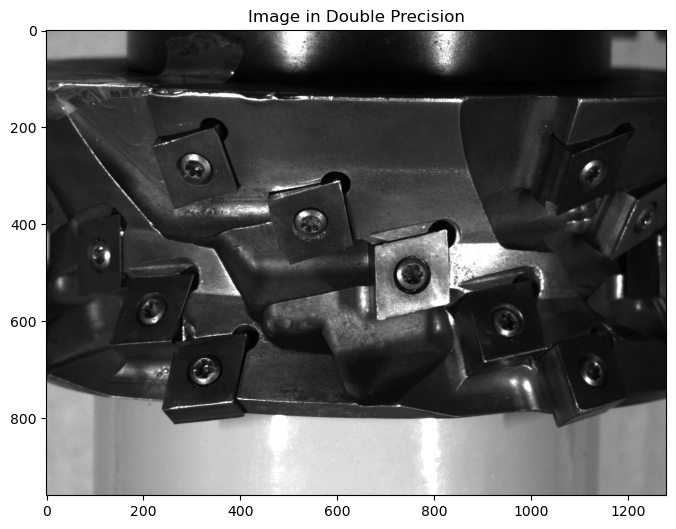

In [42]:
path = 'C:/Users/amrut/GitHub/Pattern-Recognition-Gr7/Assignment-1/Task_8/HeadTool0002.bmp'
img = plt.imread(path)
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')  
plt.title('Original Image')
plt.show()

double=np.asarray(img,dtype=np.float64) / 255.0
plt.figure(figsize=(8, 8))
plt.imshow(double, cmap='gray')  
plt.title('Image in Double Precision')
plt.show()


image_cv = cv2.imread(path)
image_bw = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)

clahe = cv2.createCLAHE(clipLimit=5)
final_img = clahe.apply(image_bw) + 30

_, ordinary_img = cv2.threshold(image_bw, 155, 255, cv2.THRESH_BINARY)
 
cv2.imshow("ordinary threshold", ordinary_img)
cv2.imshow("CLAHE image", final_img)

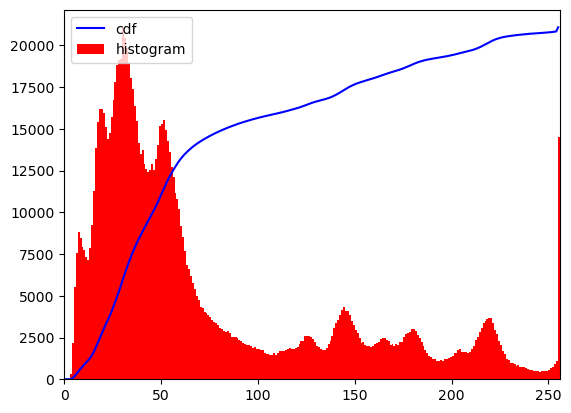

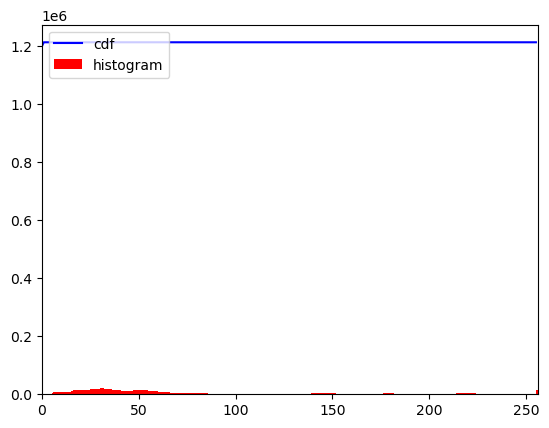

In [43]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

hist,bins = np.histogram(double.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
 
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

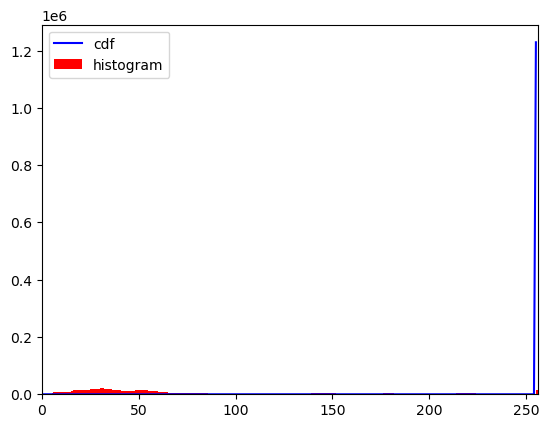

"hist,bins = np.histogram(img2_d.flatten(),256,[0,256])\n \ncdf = hist.cumsum()\ncdf_normalized = cdf * float(hist.max()) / cdf.max()\n \nplt.plot(cdf_normalized, color = 'b')\nplt.hist(img.flatten(),256,[0,256], color = 'r')\nplt.xlim([0,256])\nplt.legend(('cdf','histogram'), loc = 'upper left')\nplt.show()"

In [44]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]
#img2_d = cdf[double]

hist,bins = np.histogram(img2.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
 
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

'''hist,bins = np.histogram(img2_d.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
 
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()'''

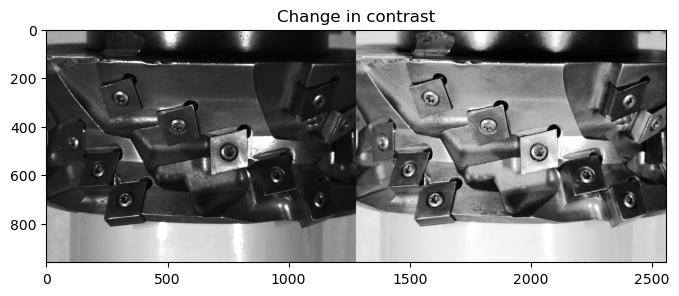

In [46]:
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv.imwrite('res.png',res)

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
 
cv.imwrite('clahe_2.jpg',cl1)

img2 = plt.imread('res.png')
plt.figure(figsize=(8, 8))
plt.imshow(img2, cmap='gray')  
plt.title('Change in contrast')
plt.show()

img2 = plt.imread('clahe_2.jpg')
plt.figure(figsize=(8, 8))
plt.imshow(img2, cmap='gray')  
plt.title('Change in contrast')
plt.show()